In [ ]:
import gdown

file_id = "1rHKiveyklxUdu5WWCfAPMvbFiBmAgDuB"



gdown.download(f"https://drive.google.com/uc?id={file_id}", "FinalData.zip", quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1rHKiveyklxUdu5WWCfAPMvbFiBmAgDuB
From (redirected): https://drive.google.com/uc?id=1rHKiveyklxUdu5WWCfAPMvbFiBmAgDuB&confirm=t&uuid=dd74d1c5-93cf-4189-9255-9009c27bee5a
To: /content/FinalData.zip
100%|██████████| 403M/403M [00:06<00:00, 58.3MB/s]


'FinalData.zip'

In [ ]:
import zipfile

print("Unzipping...")
with zipfile.ZipFile("FinalData.zip", "r") as z:
    z.extractall("dataset")

print("Done!")


Unzipping...
Done!


In [ ]:
import os
import shutil
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# ---------------- CONFIG ----------------
raw_folder = "dataset/FinalData"
cnn_base_folder = "dataset/cnn_ready_split"
img_formats = (".png", ".jpg", ".jpeg")
splits = {"train": 0.8, "val": 0.1, "test": 0.1}
payload_ratio = 0.5  # 50% of all LSBs will be embedded

# ---------------- CLEAN EXISTING CNN FOLDER ----------------
if os.path.exists(cnn_base_folder):
    shutil.rmtree(cnn_base_folder)

# ---------------- CREATE FOLDER STRUCTURE ----------------
for split in ["train", "val", "test"]:
    for cls in ["raw", "lsb"]:
        os.makedirs(os.path.join(cnn_base_folder, split, cls), exist_ok=True)

# ---------------- LSB EMBEDDING FUNCTION ----------------
def embed_lsb(img_path, payload_ratio=0.5):

    img = Image.open(img_path)
    if img.mode != "RGB":
        img = img.convert("RGB")
    arr = np.array(img, dtype=np.uint8)
    flat_arr = arr.flatten()

    num_pixels = flat_arr.size
    num_bits_to_embed = int(num_pixels * payload_ratio)


    msg_bits = np.random.randint(0, 2, num_bits_to_embed)


    flat_arr[:num_bits_to_embed] = (flat_arr[:num_bits_to_embed] & 0xFE) | msg_bits

    new_arr = flat_arr.reshape(arr.shape)
    return Image.fromarray(new_arr)

# ---------------- SPLIT AND COPY ----------------
imgs = [f for f in os.listdir(raw_folder) if f.lower().endswith(img_formats)]

train_imgs, temp_imgs = train_test_split(imgs, test_size=splits["val"] + splits["test"], random_state=42)
val_imgs, test_imgs = train_test_split(temp_imgs, test_size=splits["test"] / (splits["val"] + splits["test"]), random_state=42)

split_dict = {"train": train_imgs, "val": val_imgs, "test": test_imgs}

for split_name, split_imgs in split_dict.items():
    for img_file in split_imgs:
        raw_path = os.path.join(raw_folder, img_file)

        # COPY RAW IMAGE
        shutil.copy(raw_path, os.path.join(cnn_base_folder, split_name, "raw", img_file))

        # CREATE LSB IMAGE
        lsb_img = embed_lsb(raw_path, payload_ratio=payload_ratio)
        lsb_img.save(os.path.join(cnn_base_folder, split_name, "lsb", img_file))

print(" Dataset prepared with train/val/test splits and LSB embedded (0.5 payload).")


✅ Dataset prepared with train/val/test splits and LSB embedded (0.5 payload).


CNN Simple


Found 18586 images belonging to 2 classes.
Found 2324 images belonging to 2 classes.
Found 2324 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 80s 109ms/step - accuracy: 0.5854 - loss: 0.7063 - val_accuracy: 0.7190 - val_loss: 0.5638
Epoch 2/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 37s 63ms/step - accuracy: 0.6912 - loss: 0.5943 - val_accuracy: 0.7035 - val_loss: 0.5685
Epoch 3/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 39s 67ms/step - accuracy: 0.6960 - loss: 0.5834 - val_accuracy: 0.7272 - val_loss: 0.5626
Epoch 4/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 36s 61ms/step - accuracy: 0.7026 - loss: 0.5768 - val_accuracy: 0.7341 - val_loss: 0.5492
Epoch 5/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 37s 63ms/step - accuracy: 0.7002 - loss: 0.5906 - val_accuracy: 0.7367 - val_loss: 0.5460
Epoch 6/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 35s 60ms/step - accuracy: 0.7048 - loss: 0.5822 - val_accuracy: 0.7354 - val_loss: 0.5479
Epoch 7/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 38s

✅ Model saved as lsb_mobilenetv2_model.h5
73/73 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step

--- Validation Metrics ---
Accuracy: 0.8692
Precision: 0.8551
Recall: 0.8890
F1 Score: 0.8717

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1162
           1       0.86      0.89      0.87      1162

    accuracy                           0.87      2324
   macro avg       0.87      0.87      0.87      2324
weighted avg       0.87      0.87      0.87      2324



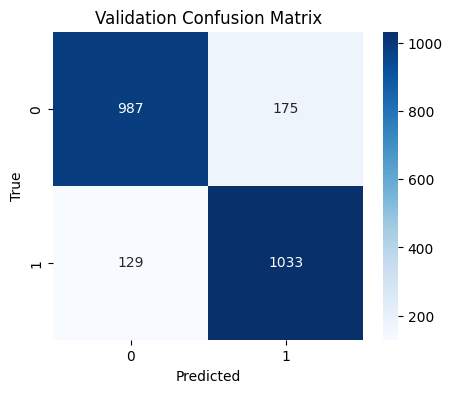

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step

--- Test Metrics ---
Accuracy: 0.8791
Precision: 0.8668
Recall: 0.8959
F1 Score: 0.8811

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1162
           1       0.87      0.90      0.88      1162

    accuracy                           0.88      2324
   macro avg       0.88      0.88      0.88      2324
weighted avg       0.88      0.88      0.88      2324



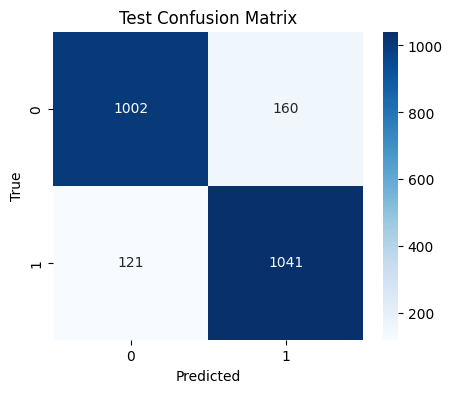

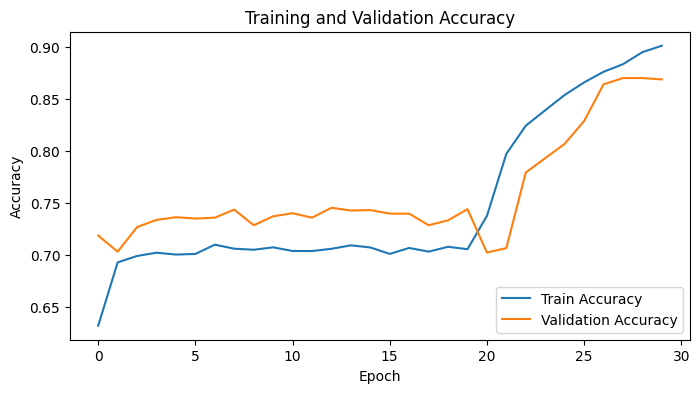

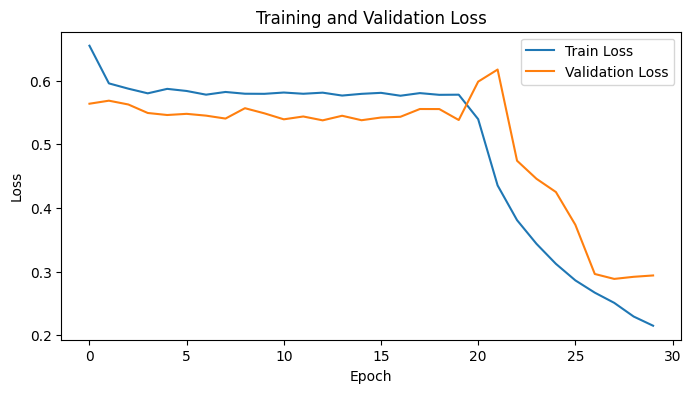


--- TRAINING AND EVALUATION COMPLETE ---


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# ---------------- CONFIG ----------------
cnn_base_folder = "dataset/cnn_ready_split"
img_height, img_width = 224, 224
batch_size = 32
initial_epochs = 20
fine_tune_epochs = 10
model_save_path = "lsb_mobilenetv2_model.h5"

# ---------------- DATA GENERATORS ----------------
train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    os.path.join(cnn_base_folder, "train"),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=42
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    os.path.join(cnn_base_folder, "val"),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    os.path.join(cnn_base_folder, "test"),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# ---------------- BUILD MODEL ----------------
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model initially

inputs = Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ---------------- TRAIN MODEL (INITIAL) ----------------
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=initial_epochs,
    verbose=1
)

# ---------------- FINE-TUNE ----------------
base_model.trainable = True
fine_tune_at = 100  # Unfreeze from this layer

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # Lower learning rate for fine-tuning
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=initial_epochs + fine_tune_epochs,
    initial_epoch=history.epoch[-1] + 1,
    verbose=1
)

# ---------------- SAVE MODEL ----------------
model.save(model_save_path)
print(f"✅ Model saved as {model_save_path}")

# ---------------- EVALUATION FUNCTION ----------------
def evaluate_model(gen, split_name="Validation"):
    gen.reset()
    preds_prob = model.predict(gen)
    preds = (preds_prob > 0.5).astype(int).reshape(-1)
    y_true = gen.classes

    acc = accuracy_score(y_true, preds)
    prec = precision_score(y_true, preds, zero_division=0)
    rec = recall_score(y_true, preds, zero_division=0)
    f1 = f1_score(y_true, preds, zero_division=0)

    print(f"\n--- {split_name} Metrics ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_true, preds, zero_division=0))

    cm = confusion_matrix(y_true, preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{split_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# ---------------- PLOT TRAINING HISTORY ----------------
def plot_history(histories, initial_epochs, fine_tune_epochs):
    acc = histories['initial'].history['accuracy'] + histories['fine'].history['accuracy']
    val_acc = histories['initial'].history['val_accuracy'] + histories['fine'].history['val_accuracy']

    loss = histories['initial'].history['loss'] + histories['fine'].history['loss']
    val_loss = histories['initial'].history['val_loss'] + histories['fine'].history['val_loss']

    epochs_range = range(initial_epochs + fine_tune_epochs)

    plt.figure(figsize=(8,4))
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

    plt.figure(figsize=(8,4))
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

# ---------------- RUN EVALUATION AND PLOTS ----------------
evaluate_model(val_gen, split_name="Validation")
evaluate_model(test_gen, split_name="Test")

plot_history({'initial': history, 'fine': history_fine}, initial_epochs, fine_tune_epochs)

print("\n--- TRAINING AND EVALUATION COMPLETE ---")

unfreeeze


Found 18586 images belonging to 2 classes.
Found 2324 images belonging to 2 classes.
Found 2324 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


581/581 ━━━━━━━━━━━━━━━━━━━━ 56s 82ms/step - accuracy: 0.5827 - loss: 0.7151 - val_accuracy: 0.7031 - val_loss: 0.5729
Epoch 2/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 35s 60ms/step - accuracy: 0.6949 - loss: 0.5960 - val_accuracy: 0.7324 - val_loss: 0.5561
Epoch 3/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 35s 61ms/step - accuracy: 0.6907 - loss: 0.5944 - val_accuracy: 0.7423 - val_loss: 0.5477
Epoch 4/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 34s 59ms/step - accuracy: 0.7085 - loss: 0.5747 - val_accuracy: 0.7212 - val_loss: 0.5605
Epoch 5/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 37s 63ms/step - accuracy: 0.7112 - loss: 0.5729 - val_accuracy: 0.7397 - val_loss: 0.5401
Epoch 6/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 37s 64ms/step - accuracy: 0.7029 - loss: 0.5843 - val_accuracy: 0.7121 - val_loss: 0.5603
Epoch 7/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 35s 60ms/step - accuracy: 0.7055 - loss: 0.5710 - val_accuracy: 0.7380 - val_loss: 0.5413
Epoch 8/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 34s 59ms/step - accuracy: 0.7034 - loss: 0.5745 - val_accurac

✅ Model saved as lsb_mobilenetv2_model.h5
73/73 ━━━━━━━━━━━━━━━━━━━━ 13s 114ms/step

--- Validation Metrics ---
Accuracy: 0.9694
Precision: 0.9588
Recall: 0.9811
F1 Score: 0.9698

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1162
           1       0.96      0.98      0.97      1162

    accuracy                           0.97      2324
   macro avg       0.97      0.97      0.97      2324
weighted avg       0.97      0.97      0.97      2324



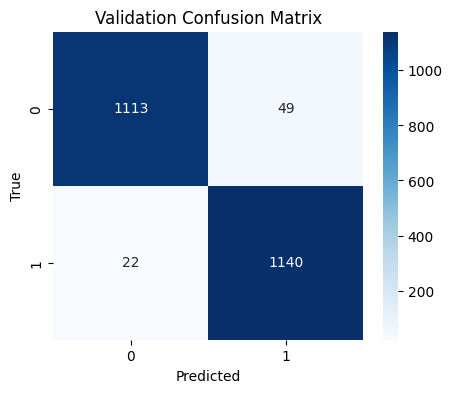

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step

--- Test Metrics ---
Accuracy: 0.9660
Precision: 0.9554
Recall: 0.9776
F1 Score: 0.9664

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1162
           1       0.96      0.98      0.97      1162

    accuracy                           0.97      2324
   macro avg       0.97      0.97      0.97      2324
weighted avg       0.97      0.97      0.97      2324



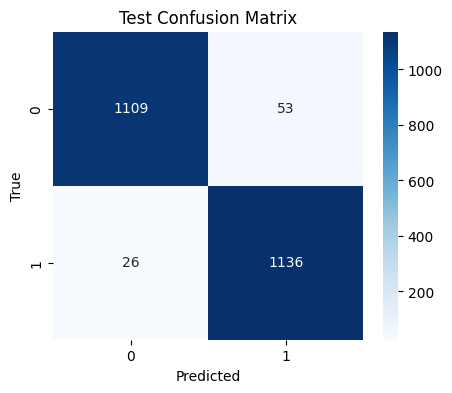

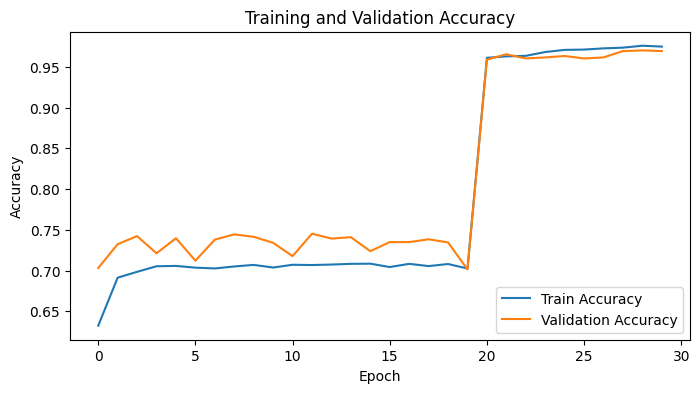

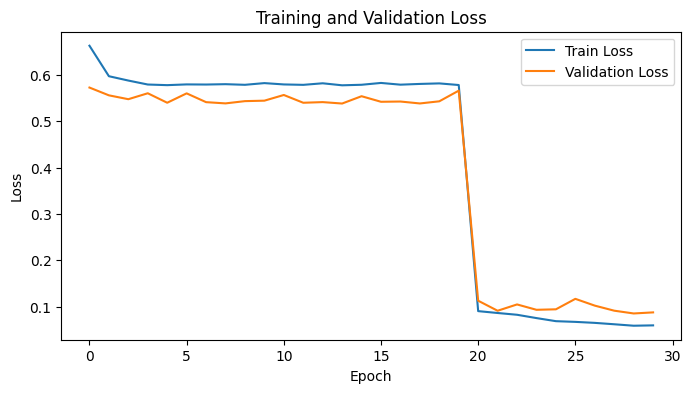


--- TRAINING AND EVALUATION COMPLETE ---


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# ---------------- CONFIG ----------------
cnn_base_folder = "dataset/cnn_ready_split"
img_height, img_width = 224, 224
batch_size = 32
initial_epochs = 20
fine_tune_epochs = 10
model_save_path = "lsb_mobilenetv2_model.h5"

# ---------------- DATA GENERATORS ----------------
train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    os.path.join(cnn_base_folder, "train"),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=42
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    os.path.join(cnn_base_folder, "val"),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    os.path.join(cnn_base_folder, "test"),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# ---------------- BUILD MODEL ----------------
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model initially

inputs = Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ---------------- TRAIN MODEL (INITIAL) ----------------
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=initial_epochs,
    verbose=1
)


# ---------------- FINE-TUNE ----------------
base_model.trainable = True   # Unfreeze ALL layers

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # small LR for fine-tuning
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=initial_epochs + fine_tune_epochs,
    initial_epoch=history.epoch[-1] + 1,
    verbose=1
)


model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # Lower learning rate for fine-tuning
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=initial_epochs + fine_tune_epochs,
    initial_epoch=history.epoch[-1] + 1,
    verbose=1
)

# ---------------- SAVE MODEL ----------------
model.save(model_save_path)
print(f"✅ Model saved as {model_save_path}")

# ---------------- EVALUATION FUNCTION ----------------
def evaluate_model(gen, split_name="Validation"):
    gen.reset()
    preds_prob = model.predict(gen)
    preds = (preds_prob > 0.5).astype(int).reshape(-1)
    y_true = gen.classes

    acc = accuracy_score(y_true, preds)
    prec = precision_score(y_true, preds, zero_division=0)
    rec = recall_score(y_true, preds, zero_division=0)
    f1 = f1_score(y_true, preds, zero_division=0)

    print(f"\n--- {split_name} Metrics ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_true, preds, zero_division=0))

    cm = confusion_matrix(y_true, preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{split_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# ---------------- PLOT TRAINING HISTORY ----------------
def plot_history(histories, initial_epochs, fine_tune_epochs):
    acc = histories['initial'].history['accuracy'] + histories['fine'].history['accuracy']
    val_acc = histories['initial'].history['val_accuracy'] + histories['fine'].history['val_accuracy']

    loss = histories['initial'].history['loss'] + histories['fine'].history['loss']
    val_loss = histories['initial'].history['val_loss'] + histories['fine'].history['val_loss']

    epochs_range = range(initial_epochs + fine_tune_epochs)

    plt.figure(figsize=(8,4))
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

    plt.figure(figsize=(8,4))
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

# ---------------- RUN EVALUATION AND PLOTS ----------------
evaluate_model(val_gen, split_name="Validation")
evaluate_model(test_gen, split_name="Test")

plot_history({'initial': history, 'fine': history_fine}, initial_epochs, fine_tune_epochs)

print("\n--- TRAINING AND EVALUATION COMPLETE ---")

Prevention Overfitting

Found 18586 images belonging to 2 classes.
Found 2324 images belonging to 2 classes.
Found 2324 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


581/581 ━━━━━━━━━━━━━━━━━━━━ 59s 87ms/step - accuracy: 0.5681 - loss: 0.7600 - val_accuracy: 0.6984 - val_loss: 0.5826
Epoch 2/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 42s 73ms/step - accuracy: 0.6618 - loss: 0.6224 - val_accuracy: 0.6954 - val_loss: 0.5810
Epoch 3/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 37s 64ms/step - accuracy: 0.6778 - loss: 0.6113 - val_accuracy: 0.7203 - val_loss: 0.5641
Epoch 4/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 42s 71ms/step - accuracy: 0.6805 - loss: 0.6098 - val_accuracy: 0.7199 - val_loss: 0.5575
Epoch 5/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 36s 62ms/step - accuracy: 0.6797 - loss: 0.6067 - val_accuracy: 0.7263 - val_loss: 0.5573
Epoch 6/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 40s 69ms/step - accuracy: 0.6813 - loss: 0.6082 - val_accuracy: 0.7220 - val_loss: 0.5678
Epoch 7/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 37s 64ms/step - accuracy: 0.6826 - loss: 0.6051 - val_accuracy: 0.7354 - val_loss: 0.5557
Epoch 8/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 39s 66ms/step - accuracy: 0.6815 - loss: 0.6055 - val_accurac

Model saved as: lsb_mobilenetv2_model.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

73/73 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step

--- Validation Metrics ---
Accuracy: 0.8386
Precision: 0.8298
Recall: 0.8520
F1 Score: 0.8408

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1162
           1       0.83      0.85      0.84      1162

    accuracy                           0.84      2324
   macro avg       0.84      0.84      0.84      2324
weighted avg       0.84      0.84      0.84      2324



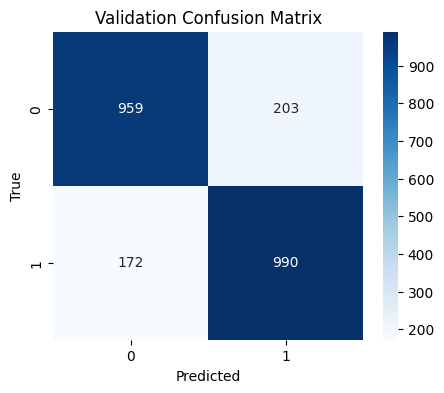

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step

--- Test Metrics ---
Accuracy: 0.8511
Precision: 0.8452
Recall: 0.8597
F1 Score: 0.8524

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1162
           1       0.85      0.86      0.85      1162

    accuracy                           0.85      2324
   macro avg       0.85      0.85      0.85      2324
weighted avg       0.85      0.85      0.85      2324



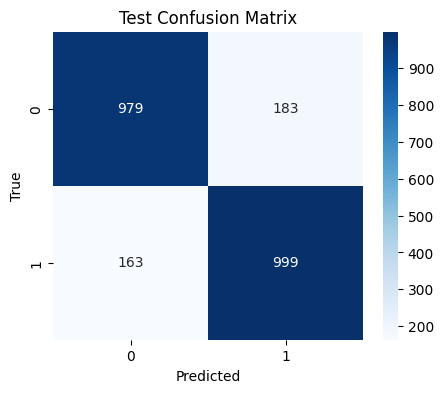

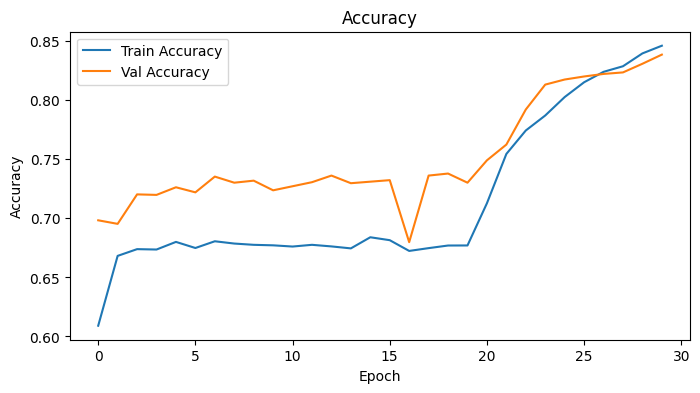

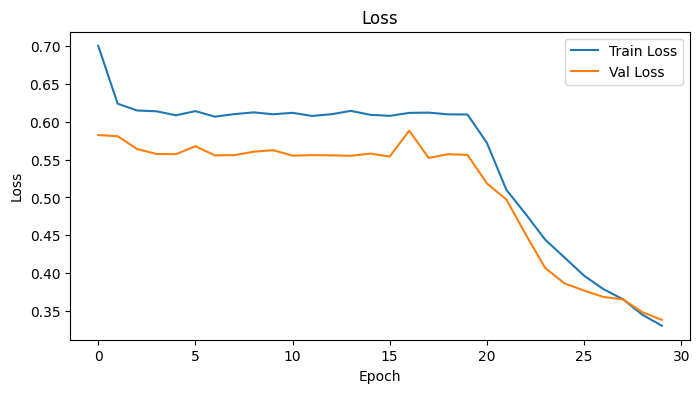


Training + evaluation done.


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# ---------------- CONFIG ----------------
cnn_base_folder = "dataset/cnn_ready_split"
img_height, img_width = 224, 224
batch_size = 32
initial_epochs = 20
fine_tune_epochs = 10
UNFREEZE_LAYERS = 40   # only unfreeze last 40 layers
model_save_path = "lsb_mobilenetv2_model.h5"


# ---------------- DATA GENERATORS ----------------
train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    os.path.join(cnn_base_folder, "train"),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=42
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    os.path.join(cnn_base_folder, "val"),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    os.path.join(cnn_base_folder, "test"),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


# ---------------- BUILD MODEL ----------------
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # Freeze backbone initially

inputs = Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)                     # stronger regularization
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


# ---------------- CALLBACKS ----------------
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)


# ---------------- TRAIN INITIAL STAGE ----------------
history_initial = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=initial_epochs,
    callbacks=[early_stop],
    verbose=1
)


# ---------------- PARTIAL FINE-TUNING ----------------
# Unfreeze last N layers
for layer in base_model.layers[:-UNFREEZE_LAYERS]:
    layer.trainable = False
for layer in base_model.layers[-UNFREEZE_LAYERS:]:
    layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(5e-6),  # very small LR for stability
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=initial_epochs + fine_tune_epochs,
    initial_epoch=len(history_initial.history['loss']),
    callbacks=[early_stop],
    verbose=1
)


# ---------------- SAVE MODEL ----------------
model.save(model_save_path)
print(f"Model saved as: {model_save_path}")
from google.colab import files
files.download(model_save_path)


# ---------------- EVALUATION FUNCTION ----------------
def evaluate_model(gen, split_name="Validation"):
    gen.reset()
    probs = model.predict(gen)
    preds = (probs > 0.5).astype(int).reshape(-1)
    y_true = gen.classes

    acc = accuracy_score(y_true, preds)
    prec = precision_score(y_true, preds)
    rec = recall_score(y_true, preds)
    f1 = f1_score(y_true, preds)

    print(f"\n--- {split_name} Metrics ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_true, preds))

    cm = confusion_matrix(y_true, preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{split_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


# ---------------- PLOT HISTORY ----------------
def plot_history(initial, fine):
    acc = initial.history['accuracy'] + fine.history['accuracy']
    val_acc = initial.history['val_accuracy'] + fine.history['val_accuracy']
    loss = initial.history['loss'] + fine.history['loss']
    val_loss = initial.history['val_loss'] + fine.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(8,4))
    plt.plot(epochs, acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Val Accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

    plt.figure(figsize=(8,4))
    plt.plot(epochs, loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Val Loss')
    plt.legend()
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()


# ---------------- RUN EVERYTHING ----------------
evaluate_model(val_gen, "Validation")
evaluate_model(test_gen, "Test")
plot_history(history_initial, history_fine)

print("\nTraining + evaluation done.")
